
# **MultiLayer Perceptron For Breast Cancer Detection**








In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt


In [3]:
data=pd.read_csv('data.csv')

data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df = data.drop("id", axis = 1)
print(df.shape)

(569, 32)


In [5]:
data.drop([data.columns[32], data.columns[0]],axis=1,inplace=True)
data.rename(columns = {"diagnosis": "target"}, inplace = True)
data["target"] = [1 if i.strip() == 'M' else 0 for i in data["target"]]
data


,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
labels = data["target"]


0    357
1    212
Name: target, dtype: int64
Total: 569


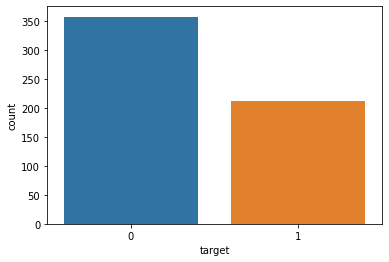

In [7]:
##lets see the number of milgnant and benign tumor in the dataset
import seaborn as sns
print(data["target"].value_counts())
print("Total:", len(data["target"]))
sns.countplot(x = data["target"])
##0 means benign and 1 means malignant
plt.show()

In [8]:
count1=0
count2=0
for i in data['target']:
  if(i==0): 
    count1=count1+1
  else: 
    count2=count2+1
print("Number of malign tumors:"+ " "+str(count1))
print("Number of benign tumors:"+ " "+str(count2))

Number of malign tumors: 357
Number of benign tumors: 212


In [9]:
df = data.drop("target", axis = 1)

In [10]:
scaler = preprocessing.StandardScaler()
df_scaled = scaler.fit_transform(df)

In [11]:
y = data["target"]
x = data.drop(["target"], axis = 1)

In [12]:
# split dataset into train and test
from sklearn.model_selection import train_test_split
# creat the train and test split

X_Train, X_Test, Y_Train, Y_Test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [13]:
# # Feature scaling
# from sklearn.preprocessing import StandardScaler
# # standardization
# scaler = StandardScaler()
# X_Train =  scaler.fit_transform(X_Train)
# X_Test = scaler.transform(X_Test)

In [14]:
#TRaining a MLP Classifier with default parameters

from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(max_iter=1000)
classifier.fit(X_Train, Y_Train)

MLPClassifier(max_iter=1000)

In [ ]:
y_pred = classifier.predict(X_Test)
y_pred.shape

(171,)

In [28]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, roc_auc_score, recall_score, top_k_accuracy_score, ConfusionMatrixDisplay

In [ ]:
accuracy = accuracy_score(Y_Test, y_pred)
print("The obtained accuracy =", accuracy*100, "%")

The obtained accuracy = 95.90643274853801 %


# **GRID SEARCH OPTIMIZATION**

In [ ]:
from sklearn.model_selection import GridSearchCV


Defining a function named MLP_Grid which takes a classifier as a parameter for its function and performs Grid Search on it

In [ ]:
#Defining the Function MLP_Grid
def MLP_Grid(classifier):
  param_grid = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
  clf= GridSearchCV(classifier, param_grid, n_jobs=-1, cv=5)
  clf.get_params()

  return clf

#Reference: All the parameters of the param_grids were referred from the following link:
# https://panjeh.medium.com/scikit-learn-hyperparameter-optimization-for-mlpclassifier-4d670413042b

In [ ]:
##Performing Bayes Optimization on the base MLP classifier using the MLP_BO function
grid_clf = MLP_Grid(classifier)

In [ ]:
grid_clf.fit(X_Train,Y_Train)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [ ]:
#Getting the Best Parameters from Grid Search
print('Best parameters found after applying Grid Search:', grid_clf.best_params_)

Best parameters found after applying Grid Search: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'solver': 'adam'}


In [ ]:
y_pred_grid = grid_clf.predict(X_Test)

In [ ]:
accuracy = accuracy_score(Y_Test, y_pred_grid)
print("The accuracy =", accuracy*100, "%")

The accuracy = 97.6608187134503 %


In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_mat_grid = confusion_matrix(Y_Test, y_pred_grid)

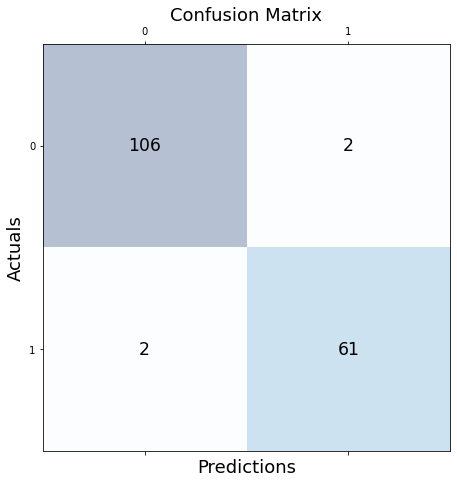

In [ ]:
##plotting the confusion matrix
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(confusion_mat_grid, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusion_mat_grid.shape[0]):
    for j in range(confusion_mat_grid.shape[1]):
        ax.text(x=j, y=i,s=confusion_mat_grid[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
precision = confusion_mat_grid[0,0]/(confusion_mat_grid[0,0] + confusion_mat_grid[1,0])
recall = confusion_mat_grid[0,0]/(confusion_mat_grid[0,0] + confusion_mat_grid[0,1])
f1_score = (2*precision * recall) / (precision + recall)

print("Precision of MLP_Grid = ", round(precision,2))
print("Recall of MLP_Grid = ",round(recall,2))
print("F1 Score of MLP_Grid = ", round(f1_score,2))

Precision of MLP_Grid =  0.98
Recall of MLP_Grid =  0.98
F1 Score of MLP_Grid =  0.98


# **MLP_Grid Cross-Validation**

In [ ]:
#Importing the K-fold Library
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix


#Performing stratified Kfold on dataset by 10-fold
skf = StratifiedKFold(n_splits=10)


test_accuracy = []
train_accuracy = []
for train_index, test_index in skf.split(x, y):
    print('for fold ->', len(train_index))

    train_data, test_data = x.iloc[train_index], x.iloc[test_index]
    train_labels, test_labels = y[train_index], y[test_index]

    predictions_train = grid_clf.predict(train_data)    
    predictions_test = grid_clf.predict(test_data)
    train_score = accuracy_score(predictions_train, train_labels)
    test_score = accuracy_score(predictions_test, test_labels)
    confusion_mat= confusion_matrix(predictions_test, test_labels)

    print ('train accuracy = ', train_score)
    print ('test accuracy = ', test_score)
    print ('iterations used for inbuilt = ', classifier.n_iter_)
    
    test_accuracy.append(train_score)
    train_accuracy.append(test_score) 

for fold -> 512
train accuracy =  0.95703125
test accuracy =  0.9649122807017544
iterations used for inbuilt =  296
for fold -> 512
train accuracy =  0.9609375
test accuracy =  0.9298245614035088
iterations used for inbuilt =  296
for fold -> 512
train accuracy =  0.9609375
test accuracy =  0.9298245614035088
iterations used for inbuilt =  296
for fold -> 512
train accuracy =  0.958984375
test accuracy =  0.9473684210526315
iterations used for inbuilt =  296
for fold -> 512
train accuracy =  0.955078125
test accuracy =  0.9824561403508771
iterations used for inbuilt =  296
for fold -> 512
train accuracy =  0.958984375
test accuracy =  0.9473684210526315
iterations used for inbuilt =  296
for fold -> 512
train accuracy =  0.95703125
test accuracy =  0.9649122807017544
iterations used for inbuilt =  296
for fold -> 512
train accuracy =  0.955078125
test accuracy =  0.9824561403508771
iterations used for inbuilt =  296
for fold -> 512
train accuracy =  0.95703125
test accuracy =  0.964912

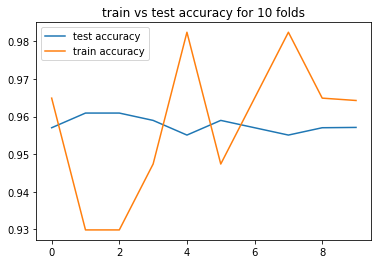

In [ ]:
plt.title('train vs test accuracy for 10 folds')
plt.plot(test_accuracy, label="test accuracy")
plt.plot(train_accuracy, label = 'train accuracy')

plt.legend()

# **Bayesian Optimization**

In [19]:
#Bayesian Optimization
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 KB 3.0 MB/s eta 0:00:00


In [20]:
#Importing Libraries for Bayesian Optimization using scikit-optimize
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.neural_network import MLPClassifier

**Defining a function named MLP_BO which takes a classifier as a parameter for its function and performs Bayesian Optimization on it**

In [21]:
#Defining the Function MLP_BO 
def MLP_BO(classifier):
  search_space=    {
        "hidden_layer_sizes": Integer(10,25),
        "activation": Categorical(["identity", "logistic", "tanh", "relu"]),
        "solver": Categorical(["lbfgs", "sgd", "adam"]),
        "alpha": Real(0.0, 1.0),
        "learning_rate": Categorical(["constant", "invscaling", "adaptive"]),
        'batch_size': [16, 32, 64, 128],
    }
  clf = BayesSearchCV(classifier,search_space,n_jobs=-1,n_iter=100,verbose=1)
  return clf

#Note: Reference to the following parameters taken for the search-space is: https://jonathan-guerne.medium.com/an-introduction-to-bayesian-optimization-for-hyperparameter-tuning-4561825bf47b


In [22]:
#Performing Bayes Optimization on the base MLP classifier using the MLP_BO function
bayes_optimizer = MLP_BO(classifier)

In [23]:
bayes_optimizer.fit(X_Train,Y_Train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


BayesSearchCV(estimator=MLPClassifier(max_iter=1000), n_iter=100, n_jobs=-1,
              search_spaces={'activation': Categorical(categories=('identity', 'logistic', 'tanh', 'relu'), prior=None),
                             'alpha': Real(low=0.0, high=1.0, prior='uniform', transform='normalize'),
                             'batch_size': [16, 32, 64, 128],
                             'hidden_layer_sizes': Integer(low=10, high=25, prior='uniform', transform='normalize'),
                             'learning_rate': Categorical(categories=('constant', 'invscaling', 'adaptive'), prior=None),
                             'solver': Categorical(categories=('lbfgs', 'sgd', 'adam'), prior=None)},
              verbose=1)

In [24]:
print('Best parameters found after Bayes_Optimization :\n', bayes_optimizer.best_params_)

Best parameters found after Bayes_Optimization :
 OrderedDict([('activation', 'relu'), ('alpha', 0.6656942078340553), ('batch_size', 64), ('hidden_layer_sizes', 14), ('learning_rate', 'invscaling'), ('solver', 'lbfgs')])


In [25]:
# # Feature scaling
# from sklearn.preprocessing import StandardScaler
# # standardization
# scaler = StandardScaler()
# X_Train =  scaler.fit_transform(X_Train)
# X_Test = scaler.fit_transform(X_Test)

In [26]:
y_pred_bayes = bayes_optimizer.predict(X_Test)

In [29]:
accuracy = accuracy_score(Y_Test, y_pred_bayes)
print("The obtained accuracy after Bayes Optimization =", accuracy*100, "%")

The obtained accuracy after Bayes Optimization = 95.90643274853801 %


In [30]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_bayes = confusion_matrix(Y_Test, y_pred_bayes)

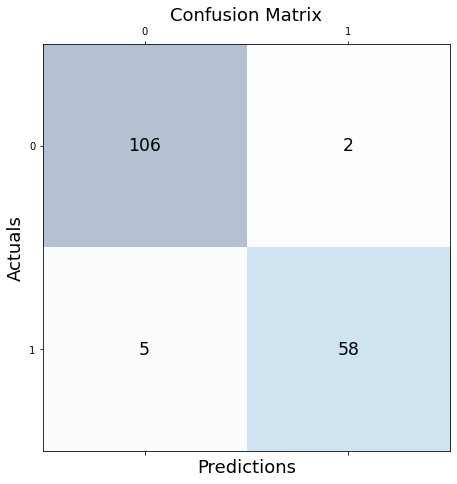

In [31]:
##plotting the confusion matrix
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(confusion_matrix_bayes, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusion_matrix_bayes.shape[0]):
    for j in range(confusion_matrix_bayes.shape[1]):
        ax.text(x=j, y=i,s=confusion_matrix_bayes[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [32]:
precision = confusion_matrix_bayes[0,0]/(confusion_matrix_bayes[0,0] + confusion_matrix_bayes[1,0])
recall = confusion_matrix_bayes[0,0]/(confusion_matrix_bayes[0,0] + confusion_matrix_bayes[0,1])
f1_score = (2*precision * recall) / (precision + recall)

print("Precision of MLP_BO = ", precision)
print("Recall of MLP_BO = ",recall)
print("F1 Score of MLP_BO = ", f1_score)

Precision of MLP_BO =  0.954954954954955
Recall of MLP_BO =  0.9814814814814815
F1 Score of MLP_BO =  0.9680365296803655


NameError: ignored

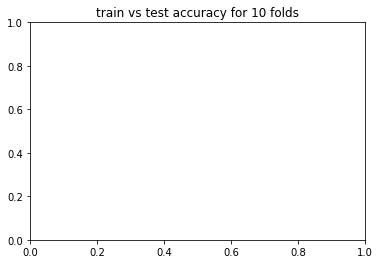

In [15]:
plt.title('train vs test accuracy for 10 folds')
plt.plot(test_accuracy, label="test accuracy")
plt.plot(train_accuracy, label = 'train accuracy')

plt.legend()

# **MLP_BO Cross-Validation**

In [ ]:

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

skf = StratifiedKFold(n_splits=20)

skf.get_n_splits(x, y)

test_accuracy = []
train_accuracy = []
miss_rate_all = []

for train_index, test_index in skf.split(x, y):
    print('fold ->', len(train_index))

    train_data, test_data = x.iloc[train_index], x.iloc[test_index]
    train_labels, test_labels = y[train_index], y[test_index]

    predictions_train = bayes_optimizer.predict(train_data)    
    predictions_test = bayes_optimizer.predict(test_data)
    train_score = accuracy_score( train_labels,predictions_train)
    test_score = accuracy_score(predictions_test, test_labels)
    confusion_mat = confusion_matrix(predictions_test, test_labels)

    print ('train accuracy = ', train_score)
    print ('test accuracy = ', test_score)
    print ('iterations used for inbuilt = ', classifier.n_iter_)
    
    test_accuracy.append(train_score)
    train_accuracy.append(test_score) 

    print ()


fold -> 540
train accuracy =  0.9592592592592593
test accuracy =  0.9655172413793104
iterations used for inbuilt =  296

fold -> 540
train accuracy =  0.9629629629629629
test accuracy =  0.896551724137931
iterations used for inbuilt =  296

fold -> 540
train accuracy =  0.9574074074074074
test accuracy =  1.0
iterations used for inbuilt =  296

fold -> 540
train accuracy =  0.9592592592592593
test accuracy =  0.9655172413793104
iterations used for inbuilt =  296

fold -> 540
train accuracy =  0.9611111111111111
test accuracy =  0.9310344827586207
iterations used for inbuilt =  296

fold -> 540
train accuracy =  0.9592592592592593
test accuracy =  0.9655172413793104
iterations used for inbuilt =  296

fold -> 540
train accuracy =  0.9592592592592593
test accuracy =  0.9655172413793104
iterations used for inbuilt =  296

fold -> 540
train accuracy =  0.9611111111111111
test accuracy =  0.9310344827586207
iterations used for inbuilt =  296

fold -> 540
train accuracy =  0.9592592592592593

# **Investigation of Scenario 1 of MLP_Funnel and SVD preprocessing** 

**PART A: Creating a Funnel shaped MLP**

In [ ]:
#Creating a random MLP classifier which has a funnel shape
MLP_Funnel = MLPClassifier(hidden_layer_sizes=(64,32,16))


In [ ]:
# Fit the classifier to your data
MLP_Funnel.fit(X_Train, Y_Train)

# Predict the labels of your test data
y_pred_funnel = MLP_Funnel.predict(X_Test)

# Evaluate the performance of your classifier
accuracy = accuracy_score(Y_Test, y_pred_funnel)
print("The obtained accuracy of the Funnel MLP =", accuracy*100, "%")

The obtained accuracy of the Funnel MLP = 94.73684210526315 %


In [ ]:
#Performing Grid Search on the MLP_Funnel using the MLP_Grid function defined earlier

Funnel_Grid = MLP_Grid(MLP_Funnel)

In [ ]:
Funnel_Grid.fit(X_Train,Y_Train)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5, estimator=MLPClassifier(hidden_layer_sizes=(64, 32, 16)),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [ ]:
print('Best parameters found after perform Grid Search on MLP_Funnel:\n', Funnel_Grid.best_params_)

Best parameters found after perform Grid Search on MLP_Funnel:
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'adam'}


In [ ]:
y_pred_funnel_grid = Funnel_Grid.predict(X_Test)
accuracy = accuracy_score(Y_Test, y_pred_funnel_grid)
print("The obtained accuracy of the Funnel MLP after Grid search =", accuracy*100, "%")

The obtained accuracy of the Funnel MLP after Grid search = 93.56725146198829 %


In [ ]:
confusion_matrix_funnel = confusion_matrix(Y_Test, y_pred_funnel_grid)

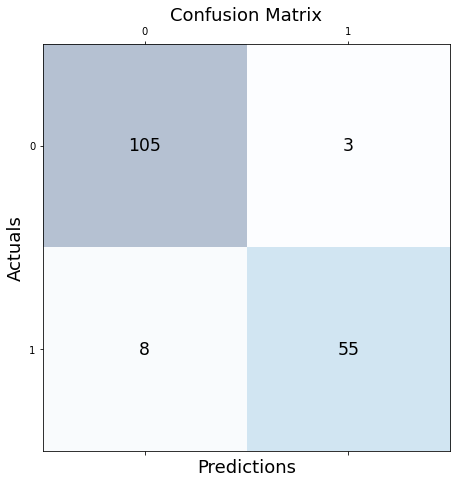

In [ ]:
##plotting the confusion matrix
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(confusion_matrix_funnel, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusion_matrix_funnel.shape[0]):
    for j in range(confusion_matrix_funnel.shape[1]):
        ax.text(x=j, y=i,s=confusion_matrix_funnel[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
#Obtaining Precision,Recall and F1 score
precision = confusion_matrix_funnel[0,0]/(confusion_matrix_funnel[0,0] + confusion_matrix_funnel[1,0])
recall = confusion_matrix_funnel[0,0]/(confusion_matrix_funnel[0,0] + confusion_matrix_funnel[0,1])
f1_score = (2*precision * recall) / (precision + recall)

print("Precision of MLP_Funnel after Grid search = ", round(precision,2))
print("Recall of MLP_Funnel after Grid search = ",round(recall,2))
print("F1 Score of MLP_Funnel after Grid search = ", round(f1_score,2))

Precision of MLP_Funnel after Grid search =  0.93
Recall of MLP_Funnel after Grid search =  0.97
F1 Score of MLP_Funnel after Grid search =  0.95


In [ ]:
#Performing 10-fold validation
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
skf = StratifiedKFold(n_splits=10)


test_accuracy = []
train_accuracy = []
miss_rate_all = []

for train_index, test_index in skf.split(x, y):
    print('fold ->', len(train_index))

    train_data, test_data = x.iloc[train_index], x.iloc[test_index]
    train_labels, test_labels = y[train_index], y[test_index]

    predictions_train = Funnel_Grid.predict(train_data)    
    predictions_test = Funnel_Grid.predict(test_data)
    train_score = accuracy_score(predictions_train, train_labels)
    test_score = accuracy_score(predictions_test, test_labels)
    confusion_mat = confusion_matrix(predictions_test, test_labels)

    print ('train accuracy = ', train_score)
    print ('test accuracy = ', test_score)
    
    test_accuracy.append(train_score)
    train_accuracy.append(test_score) 

    print ()


fold -> 512
train accuracy =  0.916015625
test accuracy =  0.9473684210526315

fold -> 512
train accuracy =  0.916015625
test accuracy =  0.9473684210526315

fold -> 512
train accuracy =  0.921875
test accuracy =  0.8947368421052632

fold -> 512
train accuracy =  0.916015625
test accuracy =  0.9473684210526315

fold -> 512
train accuracy =  0.919921875
test accuracy =  0.9122807017543859

fold -> 512
train accuracy =  0.921875
test accuracy =  0.8947368421052632

fold -> 512
train accuracy =  0.916015625
test accuracy =  0.9473684210526315

fold -> 512
train accuracy =  0.919921875
test accuracy =  0.9122807017543859

fold -> 512
train accuracy =  0.921875
test accuracy =  0.8947368421052632

fold -> 513
train accuracy =  0.9220272904483431
test accuracy =  0.8928571428571429



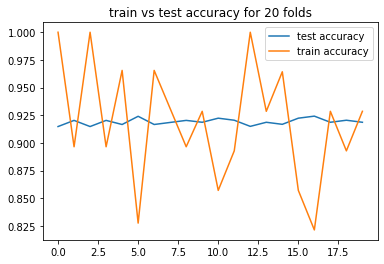

In [ ]:
plt.title('train vs test accuracy for 20 folds')
plt.plot(test_accuracy, label="test accuracy")
plt.plot(train_accuracy, label = 'train accuracy')

plt.legend()

# **Part B part implemntation of SVD for preprocessing of data**

In [ ]:
#SVD 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

In [ ]:
truncatedSVD=TruncatedSVD(x.shape[1])
X_truncated = truncatedSVD.fit_transform(x)
s = truncatedSVD.singular_values_

Singular Values
[30786.44462784  2480.44578339   880.46294478   555.12328791
   153.14218971    57.2902829     32.25424829    14.54925213
     9.83274331     7.07006116     4.42538572     2.20566405
     1.40917082     1.16924142     0.86809424     0.61863798
     0.47476181     0.46143399     0.32802127     0.30750238
     0.21072901     0.2017298      0.14089144     0.12712738
     0.09860064     0.08425928     0.05647137     0.04446295
     0.03374652     0.02072656]
Explained Variability
[99.2394111   0.64420573  0.08116845  0.03226592  0.00245558  0.00034366
  0.00010893  0.00002216  0.00001012  0.00000523  0.00000205  0.00000051
  0.00000021  0.00000014  0.00000008  0.00000004  0.00000002  0.00000002
  0.00000001  0.00000001  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]


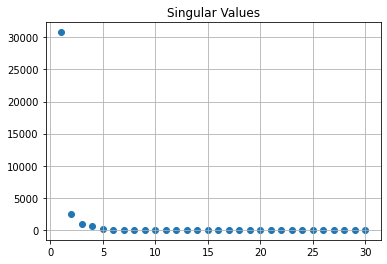

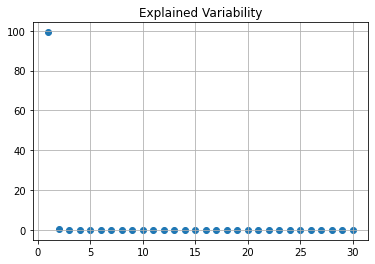

In [ ]:
# plot the singular values
plt.figure(1)
plt.scatter([i+1 for i in range(len(s))],s)
plt.title('Singular Values')
plt.grid()

np.set_printoptions(suppress=True)

print('Singular Values')
print(s)
      
print('Explained Variability')
print((s**2/np.sum(s**2))*100)

np.set_printoptions(suppress=False)

# plot explained variability
plt.figure(2)
plt.scatter([i+1 for i in range(len(s))],(s**2/np.sum(s**2))*100)
plt.title('Explained Variability')
plt.grid()

In [ ]:
threshold = 5
count_of_above_threshold = np.sum([1 if i>threshold else 0 for i in s])

print(f"Count of singular values above threshold ({threshold}) = {count_of_above_threshold}")

# reconstruct with singular matrices above threshold

# Extract the data matrix
truncatedSVD=TruncatedSVD(count_of_above_threshold)
X_truncated = truncatedSVD.fit_transform(x)
X_truncated.shape

Count of singular values above threshold (5) = 10


(569, 10)

In [ ]:
# import numpy as np
# from sklearn.model_selection import KFold
# kf = KFold(n_splits=5)
# kf.get_n_splits(X_truncated)

In [ ]:
X_truncated.shape, y.shape

((569, 10), (569,))

In [ ]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import confusion_matrix

# skf = StratifiedKFold(n_splits=5)
# skf.get_n_splits(X_truncated, y)

# test_accuracy = []
# train_accuracy = []
# miss_rate_all = []

# for train_index, test_index in skf.split(X_truncated, y):
#     print('fold ->', len(train_index))

In [ ]:
#Splitting the dataset based on the new X_truncated value obtained after SVD instead of original x.
X_train, X_test, y_train, y_test = train_test_split(X_truncated, y,test_size=0.2, random_state=42)

# Train an MLP classifier on the training set
SVD_classifer = MLPClassifier(max_iter=1000)
SVD_classifer.fit(X_train, y_train)



MLPClassifier(max_iter=1000)

In [ ]:
# Predict the classes of the test set
y_pred_SVD = SVD_classifer.predict(X_test)

# Compute the accuracy of the classifier on the test set
accuracy = accuracy_score(y_test, y_pred_SVD)
print("The obtained accuracy of the base MLP classifier after SVD preprocessing =", accuracy*100, "%")

The obtained accuracy of the base MLP classifier after SVD preprocessing = 94.73684210526315 %


In [ ]:
#Performing MLP_Grid on the classifier obtained from data after SVD
Grid_SvD = MLP_Grid(SVD_classifer)
Grid_SvD.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [ ]:
print('Best parameters of Svd_Grid found:\n', Grid_SvD.best_params_)

Best parameters of Svd_Grid found:
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'solver': 'adam'}


In [ ]:
# Predict the classes of the test set
y_pred_SVD_Grid = Grid_SvD.predict(X_test)

# Compute the accuracy of the classifier on the test set
accuracy = accuracy_score(y_test, y_pred_SVD_Grid)
print("The obtained accuracy of the SVD_classifer after GRID search =", accuracy*100, "%")

The obtained accuracy of the SVD_classifer after GRID search = 95.6140350877193 %


In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_SVD_grid = confusion_matrix(y_test, y_pred_SVD_Grid)

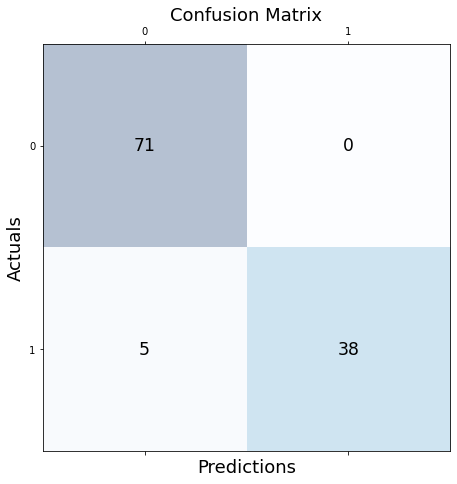

In [ ]:
##plotting the confusion matrix
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(confusion_matrix_SVD_grid, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusion_matrix_SVD_grid.shape[0]):
    for j in range(confusion_matrix_SVD_grid.shape[1]):
        ax.text(x=j, y=i,s=confusion_matrix_SVD_grid[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
#Obtaining Precision,Recall and F1 score
precision = confusion_matrix_SVD_grid[0,0]/(confusion_matrix_SVD_grid[0,0] + confusion_matrix_SVD_grid[1,0])
recall = confusion_matrix_SVD_grid[0,0]/(confusion_matrix_SVD_grid[0,0] + confusion_matrix_SVD_grid[0,1])
f1_score = (2*precision * recall) / (precision + recall)

print("Precision of SVD classifier after Grid search = ", round(precision,2))
print("Recall of SVD classifier after Grid search = ",round(recall,2))
print("F1 Score of SVD classifier after Grid search = ", round(f1_score,2))

Precision of SVD classifier after Grid search =  0.93
Recall of SVD classifier after Grid search =  1.0
F1 Score of SVD classifier after Grid search =  0.97


In [ ]:
#Performing 10-fold validation on the SVD_Grid

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
skf = StratifiedKFold(n_splits=10)


test_accuracy = []
train_accuracy = []
miss_rate_all = []

for train_index, test_index in skf.split(X_truncated, y):
    print('fold ->', len(train_index))

    train_data, test_data = X_truncated[train_index], X_truncated[test_index]
    train_labels, test_labels = y[train_index], y[test_index]

    predictions_train = Grid_SvD.predict(train_data)    
    predictions_test = Grid_SvD.predict(test_data)
    train_score = accuracy_score(predictions_train, train_labels)
    test_score = accuracy_score(predictions_test, test_labels)
    confusion_mat = confusion_matrix(predictions_test, test_labels)

    print ('train accuracy = ', train_score)
    print ('test accuracy = ', test_score)
    
    test_accuracy.append(train_score)
    train_accuracy.append(test_score) 

    print ()

fold -> 512
train accuracy =  0.9609375
test accuracy =  0.9473684210526315

fold -> 512
train accuracy =  0.95703125
test accuracy =  0.9824561403508771

fold -> 512
train accuracy =  0.962890625
test accuracy =  0.9298245614035088

fold -> 512
train accuracy =  0.958984375
test accuracy =  0.9649122807017544

fold -> 512
train accuracy =  0.95703125
test accuracy =  0.9824561403508771

fold -> 512
train accuracy =  0.95703125
test accuracy =  0.9824561403508771

fold -> 512
train accuracy =  0.962890625
test accuracy =  0.9298245614035088

fold -> 512
train accuracy =  0.9609375
test accuracy =  0.9473684210526315

fold -> 512
train accuracy =  0.9609375
test accuracy =  0.9473684210526315

fold -> 513
train accuracy =  0.9571150097465887
test accuracy =  0.9821428571428571



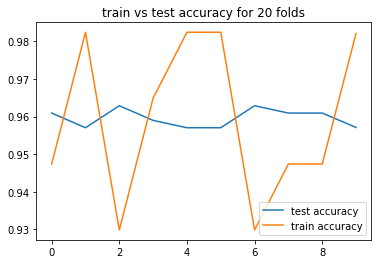

In [ ]:
plt.title('train vs test accuracy for 20 folds')
plt.plot(test_accuracy, label="test accuracy")
plt.plot(train_accuracy, label = 'train accuracy')

plt.legend()

In [ ]:
#Performing MLP_BO on the classifier obtained from data after SVD
BO_SvD = MLP_BO(SVD_classifer)
BO_SvD.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


BayesSearchCV(estimator=MLPClassifier(max_iter=1000), n_iter=100, n_jobs=-1,
              search_spaces={'activation': Categorical(categories=('identity', 'logistic', 'tanh', 'relu'), prior=None),
                             'alpha': Real(low=0.0, high=1.0, prior='uniform', transform='normalize'),
                             'batch_size': [16, 32, 64, 128],
                             'hidden_layer_sizes': Integer(low=10, high=25, prior='uniform', transform='normalize'),
                             'learning_rate': Categorical(categories=('constant', 'invscaling', 'adaptive'), prior=None),
                             'solver': Categorical(categories=('lbfgs', 'sgd', 'adam'), prior=None)},
              verbose=1)

In [ ]:
print('Best parameters of Svd_BO found:\n', BO_SvD.best_params_)

Best parameters of Svd_BO found:
 OrderedDict([('activation', 'identity'), ('alpha', 0.41342071499855043), ('batch_size', 128), ('hidden_layer_sizes', 22), ('learning_rate', 'constant'), ('solver', 'adam')])


In [ ]:
# Predict the classes of the test set
y_pred_SVD_BO = BO_SvD.predict(X_test)

# Compute the accuracy of the classifier on the test set
accuracy = accuracy_score(y_test, y_pred_SVD_BO)
print("The obtained accuracy of the SVD_classifer after GRID search =", accuracy*100, "%")

The obtained accuracy of the SVD_classifer after GRID search = 94.73684210526315 %


In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_SVD_BO = confusion_matrix(y_test, y_pred_SVD_BO)

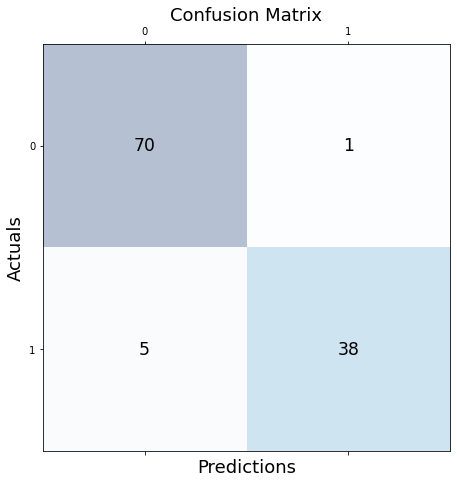

In [ ]:
##plotting the confusion matrix
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(confusion_matrix_SVD_BO, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusion_matrix_SVD_BO.shape[0]):
    for j in range(confusion_matrix_SVD_BO.shape[1]):
        ax.text(x=j, y=i,s=confusion_matrix_SVD_BO[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
#Obtaining Precision,Recall and F1 score
precision = confusion_matrix_SVD_BO[0,0]/(confusion_matrix_SVD_BO[0,0] + confusion_matrix_SVD_BO[1,0])
recall = confusion_matrix_SVD_BO[0,0]/(confusion_matrix_SVD_BO[0,0] + confusion_matrix_SVD_BO[0,1])
f1_score = (2*precision * recall) / (precision + recall)

print("Precision of SVD classifier after Bayes Optimization = ", round(precision,2))
print("Recall of SVD classifier after Bayes Optimization = ",round(recall,2))
print("F1 Score of SVD classifier after Bayes Optimization = ", round(f1_score,2))

Precision of SVD classifier after Bayes Optimization =  0.93
Recall of SVD classifier after Bayes Optimization =  0.99
F1 Score of SVD classifier after Bayes Optimization =  0.96


In [ ]:
#Performing 10-fold validation on the SVD_BO

from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10)


test_accuracy = []
train_accuracy = []
miss_rate_all = []

for train_index, test_index in skf.split(X_truncated, y):
    print('fold ->', len(train_index))

    train_data, test_data = X_truncated[train_index], X_truncated[test_index]
    train_labels, test_labels = y[train_index], y[test_index]

    predictions_train = BO_SvD.predict(train_data)    
    predictions_test = BO_SvD.predict(test_data)
    train_score = accuracy_score(predictions_train, train_labels)
    test_score = accuracy_score(predictions_test, test_labels)
    confusion_mat = confusion_matrix(predictions_test, test_labels)

    print ('train accuracy = ', train_score)
    print ('test accuracy = ', test_score)
    
    test_accuracy.append(train_score)
    train_accuracy.append(test_score) 

    print ()

fold -> 512
train accuracy =  0.939453125
test accuracy =  0.9298245614035088

fold -> 512
train accuracy =  0.943359375
test accuracy =  0.8947368421052632

fold -> 512
train accuracy =  0.94140625
test accuracy =  0.9122807017543859

fold -> 512
train accuracy =  0.9375
test accuracy =  0.9473684210526315

fold -> 512
train accuracy =  0.935546875
test accuracy =  0.9649122807017544

fold -> 512
train accuracy =  0.939453125
test accuracy =  0.9298245614035088

fold -> 512
train accuracy =  0.935546875
test accuracy =  0.9649122807017544

fold -> 512
train accuracy =  0.943359375
test accuracy =  0.8947368421052632

fold -> 512
train accuracy =  0.935546875
test accuracy =  0.9649122807017544

fold -> 513
train accuracy =  0.9337231968810916
test accuracy =  0.9821428571428571



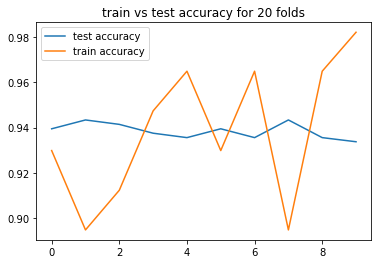

In [ ]:
plt.title('train vs test accuracy for 20 folds')
plt.plot(test_accuracy, label="test accuracy")
plt.plot(train_accuracy, label = 'train accuracy')

plt.legend()